# 项目案例一：客户数据聚类

## 案例背景
假设我们是一家电子商务公司，我们拥有大量的客户数据。这些数据包括客户的购物习惯、浏览记录、购买频率等。我们希望通过分析这些数据，将客户分成不同的群体，以便更好地进行个性化推荐和精准营销。

为此，我们决定使用高斯混合模型（Gaussian Mixture Model，GMM）来对客户数据进行聚类。高斯混合模型是一种基于概率的聚类方法，它假设数据点是由多个高斯分布（即正态分布）生成的，并通过期望最大化（EM）算法来估计每个高斯分布的参数。

在这个案例中，我们将模拟生成一些高维数据，代表不同类型的客户，然后使用高斯混合模型对这些数据进行聚类，最后通过可视化展示聚类结果。


## 实验步骤

### 第一步：数据生成

假设我们有五种不同类型的客户，每种类型的客户在购物习惯上有不同的特征。我们生成这些数据来模拟现实生活中的客户数据。

使用 numpy 生成五个不同类型的客户数据，每个类型的数据具有不同的均值和协方差矩阵。

将生成的数据合并在一起，并打乱顺序。

输出数据形状。


In [1]:
# 导入必要的库
import numpy as np

# 设置随机种子以确保结果可重复
np.random.seed(42)

# 生成第一个高斯分布的数据
mean1 = [0, 0, 0, 0, 0]  # 均值向量
cov1 = np.eye(5)  # 协方差矩阵（单位矩阵）
data1 = np.random.multivariate_normal(mean1, cov1, 100)  # 生成100个样本

# 生成第二个高斯分布的数据
mean2 = [5, 5, 5, 5, 5]
cov2 = np.eye(5)
data2 = np.random.multivariate_normal(mean2, cov2, 100)

# 生成第三个高斯分布的数据
mean3 = [0, 5, 0, 5, 0]
cov3 = np.eye(5)
data3 = np.random.multivariate_normal(mean3, cov3, 100)

# 生成第四个高斯分布的数据
mean4 = [5, 0, 5, 0, 5]
cov4 = np.eye(5)
data4 = np.random.multivariate_normal(mean4, cov4, 100)

# 生成第五个高斯分布的数据
mean5 = [2.5, 2.5, 2.5, 2.5, 2.5]
cov5 = np.eye(5)
data5 = np.random.multivariate_normal(mean5, cov5, 100)

# 合并所有生成的数据
data = np.vstack((data1, data2, data3, data4, data5))
np.random.shuffle(data)  # 打乱数据顺序

# 输出生成的数据形状
print("Data shape:", data.shape)


Data shape: (500, 5)


### 第二步：数据标准化处理

为了使不同特征的数据具有相同的尺度，我们对数据进行标准化处理。

使用 StandardScaler 对数据进行标准化处理，使其均值为0，标准差为1。


In [2]:
from sklearn.preprocessing import StandardScaler

# 数据标准化处理
scaler = StandardScaler()
X_normalized = scaler.fit_transform(data)
print("Input Data mean: {}".format(scaler.mean_))
print("Input Data var: {}".format(np.sqrt(scaler.var_)))


Input Data mean: [2.54721124 2.49501679 2.52484481 2.51241225 2.58933514]
Input Data var: [2.44085631 2.44605298 2.45493    2.42106337 2.46711703]


### 第三步：降维用于可视化

为了便于理解和展示，我们使用主成分分析（PCA）将数据降维到二维，并可视化降维后的数据。

初始化PCA，将数据降维到2维。

使用PCA对标准化后的数据进行降维。

输出降维后的数据形状，并进行初步可视化展示。


Dimensionality reduction lfw_home shape: (500, 2)


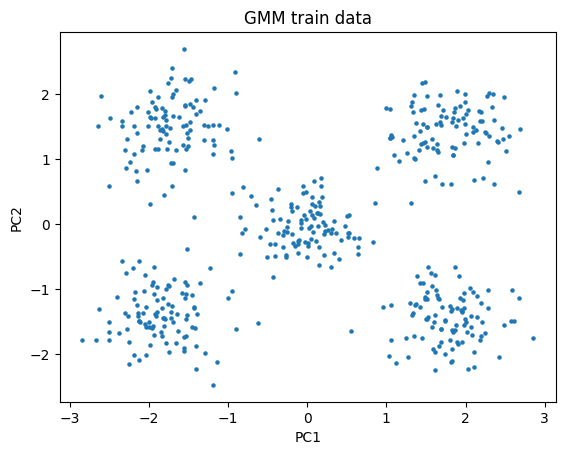

In [3]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 数据降维
pca = PCA(n_components=2)
train_data = pca.fit_transform(X_normalized)

# 输出降维后的数据形状
print("Dimensionality reduction lfw_home shape:", train_data.shape)

# 可视化降维后的数据
plt.scatter(train_data[:, 0], train_data[:, 1], s=5)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("GMM train data")
plt.show()


### 第四步：高斯混合模型初始化和训练

接下来，我们使用高斯混合模型对标准化后的数据进行聚类。

初始化高斯混合模型（GMM），设置组件数量为5（假设将客户分成5类）。

使用降维后的数据训练GMM模型。

输出训练好的GMM模型的参数，包括每个高斯分布的均值、协方差矩阵和混合系数。


In [4]:
from sklearn.mixture import GaussianMixture

# 高斯混合模型初始化和训练
GMM_model = GaussianMixture(n_components=5)
GMM_model.fit(train_data)
y_pred = GMM_model.predict(train_data)
y_prob = GMM_model.predict_proba(train_data)

# 输出高斯分布的均值、协方差矩阵和混合系数
print("GMM Model mean:\n{}".format(GMM_model.means_))
print("GMM Model covariance:\n{}".format(GMM_model.covariances_))
print("GMM Model weight:\n{}".format(GMM_model.weights_))


GMM Model mean:
[[-1.71999159  1.49302684]
 [ 1.78147211 -1.45920106]
 [-0.02484209 -0.03985979]
 [-1.83529752 -1.4013936 ]
 [ 1.78361941  1.42748348]]
GMM Model covariance:
[[[ 0.15723209  0.02729109]
  [ 0.02729109  0.20922397]]

 [[ 0.15296459 -0.00427957]
  [-0.00427957  0.14125085]]

 [[ 0.1521834  -0.01041446]
  [-0.01041446  0.10506487]]

 [[ 0.15710211 -0.00054773]
  [-0.00054773  0.16682796]]

 [[ 0.18681486  0.00670497]
  [ 0.00670497  0.15397829]]]
GMM Model weight:
[0.1977861  0.20001519 0.20205321 0.20028614 0.19985936]


### 第五步：结果可视化

最后，我们通过可视化展示聚类结果。

定义一个函数，用于绘制数据点和高斯分布的轮廓。

获取每个聚类的中心（均值），并在二维平面上进行可视化展示。


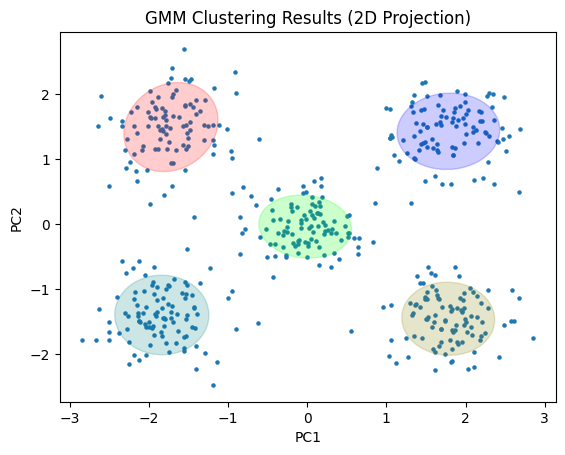

In [7]:
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from matplotlib.colors import LinearSegmentedColormap

# 可视化展示聚类结果
def plot_result(GMM_model, train_data):
    fig, ax = plt.subplots()
    # 绘制数据点
    plt.scatter(train_data[:, 0], train_data[:, 1], s=5)

    # 定义椭圆颜色列表
    color_name = 'colorlist'
    color_list = [(1, 0, 0), (0, 1, 0), (0, 0, 1)]
    mycolor = LinearSegmentedColormap.from_list(color_name, color_list, N=5)

    # 绘制椭圆
    for i, params in enumerate(zip(GMM_model.means_, GMM_model.covariances_, GMM_model.weights_)):
        pos, cov, w = params
        u, s, vt = np.linalg.svd(cov)
        angle = np.degrees(np.arctan2(u[1, 0], u[0, 0]))
        width, height = 3 * np.sqrt(s)
        ax.add_patch(Ellipse(xy = pos, width=width, height = height, angle = angle, alpha=w, color=mycolor(i / 5)))

    ax.set_xlabel("PC1")
    ax.set_ylabel("PC2")
    ax.set_title("GMM Clustering Results (2D Projection)")

    plt.show()

# 结果可视化
plot_result(GMM_model, train_data)
